# Example usage of the NNDL project


In [1]:
# Import standard libraries
import sys
from pathlib import Path
# For plotting
import matplotlib.pyplot as plt
# For numerical operations
import numpy as np
# For neural networks
import torch
import torch.nn as nn

# Import project modules
REPO_ROOT = Path('.').resolve().parent
if REPO_ROOT not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))
from src.data.dataset import PolyDataset
from src.data.transforms import ToTensor
from src.models.base_model import SimpleMLP
from src.training.trainer import LightningTrainer

In [2]:
def poly_model(x, beta, noise_std=0):
    """
    Args:
        x: x vector
        beta: polynomial parameters
        noise_std: enable noisy sampling (gaussian noise, zero mean, noise_std std)
    Returns:
        y: sampled polynomial values with noise
    """
    pol_order = len(beta)
    x_matrix = np.array([x**i for i in range(pol_order)]).transpose()
    y = np.matmul(x_matrix, beta)
    noise = np.random.randn(len(y)) * noise_std
    return y + noise

## 1. Data Preparation

In [3]:
beta_true = [8.6, -16.2, 12.2, -2.8, 0.2]  # True polynomial coefficients
noise_std = 0.2
np.random.seed(4)

# Train data
num_train_points = 200
x_train = np.random.rand(num_train_points)*5
y_train = poly_model(x_train, beta_true, noise_std)
train_dataset = PolyDataset(inputs=x_train.reshape(-1,1), targets=y_train.reshape(-1,1), transform=ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=50, shuffle=True)

# Validation data
num_val_points = 20
x_val = np.random.rand(num_val_points)*5
y_val = poly_model(x_val, beta_true, noise_std)
val_dataset = PolyDataset(inputs=x_val.reshape(-1,1), targets=y_val.reshape(-1,1), transform=ToTensor())
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)

## 2. Model Creation

In [4]:
mlp_model = SimpleMLP(
    input_dim=1,
    hidden_dims=[50, 100, 50],
    output_dim=1,
    dropout=0,
    learning_rate=1e-2,
    criterion=nn.MSELoss()
)
mlp_model.summary()


Model: SimpleMLP
SimpleMLP(
  (criterion): MSELoss()
  (network): Sequential(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=50, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=100, out_features=50, bias=True)
    (7): ReLU()
    (8): Dropout(p=0, inplace=False)
    (9): Linear(in_features=50, out_features=1, bias=True)
  )
)
Total trainable parameters: 10,301



## 3. Training

In [ ]:
lightning_trainer = LightningTrainer(
    max_epochs=50,
    log_every_n_steps=4,

    enable_checkpointing=True,

    enable_early_stopping=False,

    enable_logging=True,
    experiment_name='demo',
    overwrite_last=False,
)

# Train for a few epochs (small demo)
lightning_trainer.fit(
    model=mlp_model,
    train_loader=train_loader,
    val_loader=val_loader
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | criterion | MSELoss    | 0      | train
1 | network   | Sequential | 10.3 K | train
-------------------------------------------------
10.3 K    Trainable params
0         Non-trainable params
10.3 K    Total params
0.041     Total estimated model params size (MB)
12        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


## 4. Evaluation & Plot

To view training logs, run:
  tensorboard --logdir=lightning_logs/


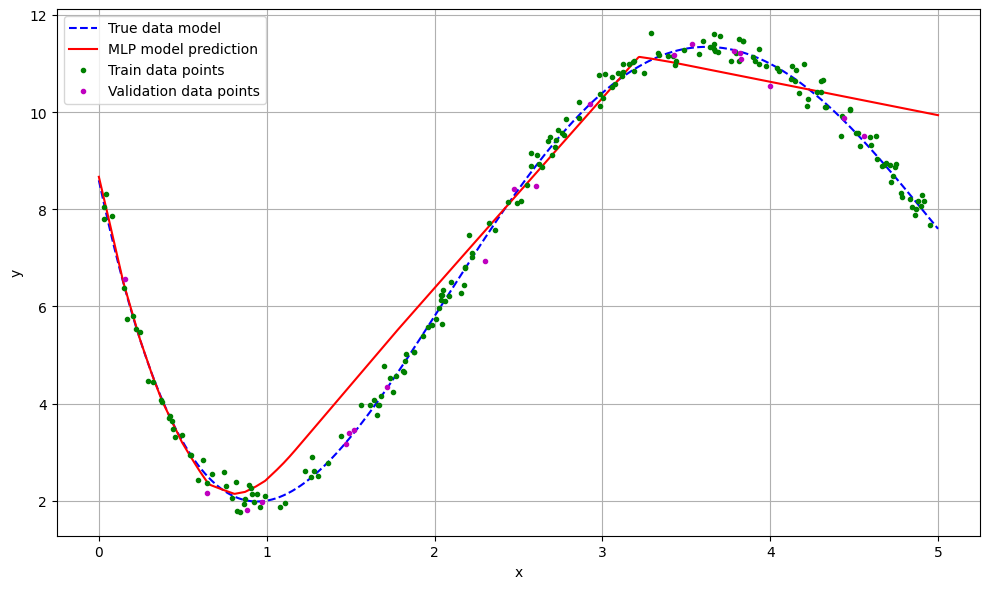

In [ ]:
plt.figure(figsize=(10,6))
x_highres = np.linspace(0,1,1000)*5
plt.plot(x_highres, poly_model(x_highres, beta_true), color='b', ls='--', label='True data model')
plt.plot(x_highres, mlp_model(torch.tensor(x_highres.reshape(-1,1), dtype=torch.float32)).detach().numpy(), color='r', ls='-', label='MLP model prediction')
plt.plot(x_train, y_train, color='g', ls='', marker='.', label='Train data points')
plt.plot(x_val, y_val, color='m', ls='', marker='.', label='Validation data points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## 5. Metrics

PyTorch Lightning salva automaticamente i log del training. Per visualizzarli eseguire dal terminale il comando:
```bash
tensorboard --logdir=lightning_logs/
```